<a href="https://colab.research.google.com/github/sahar225/bookStore/blob/main/Year-Year-Co2Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Year to Year CO2 Emissions
This Dataset contains details of Year-on-Year change in CO₂ emissions of each country from 1751 to 2023. Carbon dioxide emissions are the primary driver of global climate change. It's widely recognized that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#Load Data

df = pd.read_csv('COEmissions1.csv')

#Rename Column
df = df.rename(columns={'Entity': 'Country'})
print(df.to_string())

                                Country      Code  Year  growth_emissions_total
0                           Afghanistan       AFG  1950            6.961600e+04
1                           Afghanistan       AFG  1951            7.328000e+03
2                           Afghanistan       AFG  1952            0.000000e+00
3                           Afghanistan       AFG  1953            1.465600e+04
4                           Afghanistan       AFG  1954            0.000000e+00
5                           Afghanistan       AFG  1955            4.763200e+04
6                           Afghanistan       AFG  1956            2.931200e+04
7                           Afghanistan       AFG  1957            1.099200e+05
8                           Afghanistan       AFG  1958            3.664000e+04
9                           Afghanistan       AFG  1959            5.481100e+04
10                          Afghanistan       AFG  1960            2.931400e+04
11                          Afghanistan 

In [16]:
#Define filter conditions

selected_countries = ['United States', 'China', 'India']
year_filter = 2023

#Apply filters

filtered_df = df[
    (df["Country"].isin(selected_countries)) &
    (df["Year"] == year_filter)
]

#Group by country and compute sum of emissions
print(filtered_df)

grouped_stats = filtered_df.groupby("Country")["growth_emissions_total"].sum().reset_index()
grouped_stats["growth_emissions_total"] = grouped_stats["growth_emissions_total"].abs()


             Country Code  Year  growth_emissions_total
5138           China  CHN  2023             551964700.0
12084          India  IND  2023             231158270.0
25557  United States  USA  2023            -167479800.0


#Step 2: Plot the Data
Now, we can create a bar chart or line plot to visualize CO₂ emissions.

##Bar Plot: Emissions by Country

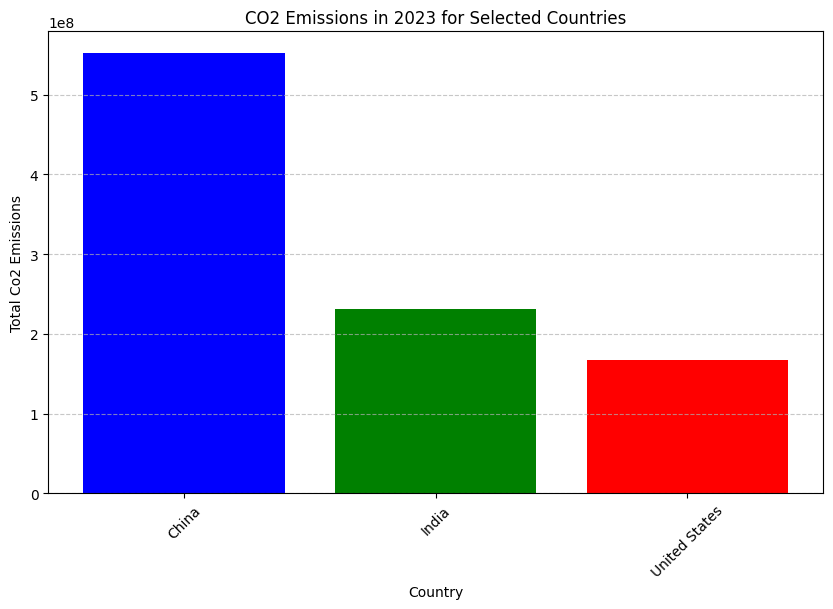

In [17]:
#Plot Emissions using bar chart
plt.figure(figsize=(10, 6))
# Separate positive and negative values
# colors = grouped_stats["growth_emissions_total"].apply(lambda x: "red" if x < 0 else "blue")

plt.bar(grouped_stats["Country"], grouped_stats["growth_emissions_total"], color=["blue", "green", "red"])

#labels and Title
plt.xlabel("Country")
plt.ylabel("Total Co2 Emissions")
plt.title(f"CO2 Emissions in {year_filter} for Selected Countries")
plt.xticks(rotation=45)  #Rotate country names if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

#Show plot
plt.show()

##Line Plot: To see Trends Over Multiple Years
To see how emissions changed over time, use a line plot instead.

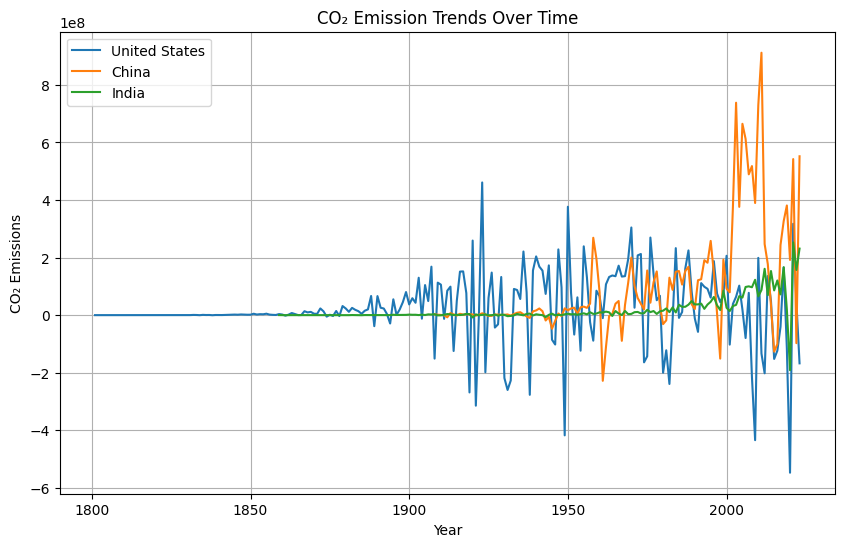

In [18]:
# Filter only for selected countries
filtered_trend_df = df[df["Country"].isin(selected_countries)]

# Plot emissions over time
plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = filtered_trend_df[filtered_trend_df["Country"] == country]
    plt.plot(country_data["Year"], country_data["growth_emissions_total"], label=country)

# Labels and Title
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.title("CO₂ Emission Trends Over Time")
plt.legend()  # Show legend
plt.grid(True)

# Show plot
plt.show()


In [19]:
# Find the top CO2 emitter
top_emitter = df.loc[df["growth_emissions_total"].idxmax(), ["Country", "growth_emissions_total"]]

# Display result
print(f"Top CO₂ emitter: {top_emitter['Country']} with {top_emitter['growth_emissions_total']} metric tons")

Top CO₂ emitter: Asia with 1233155100.0 metric tons


In [21]:
# Get the top 10 CO₂ emitters
top_10_emitters = df.nlargest(10, "growth_emissions_total")

# Display results
print(top_10_emitters[["Country", "growth_emissions_total"]])

                             Country  growth_emissions_total
1350                            Asia            1.233155e+09
1349                            Asia            1.160120e+09
25716  Upper-middle-income countries            1.088221e+09
1342                            Asia            1.005653e+09
1360                            Asia            1.005546e+09
25715  Upper-middle-income countries            9.793894e+08
25708  Upper-middle-income countries            9.630858e+08
5126                           China            9.117563e+08
1344                            Asia            8.528404e+08
1345                            Asia            8.517059e+08


In [23]:
year_filter = 2023

# Filter data for the selected year
df_year = df[df["Year"] == year_filter]

# Find the top emitter for that year
top_emitter_year = df_year.loc[df_year["growth_emissions_total"].idxmax(), ["Country", "growth_emissions_total"]]

print(f"Top CO₂ emitter in {year_filter}: {top_emitter_year['Country']} with {top_emitter_year['growth_emissions_total']} metric tons")

Top CO₂ emitter in 2023: Asia with 784463900.0 metric tons


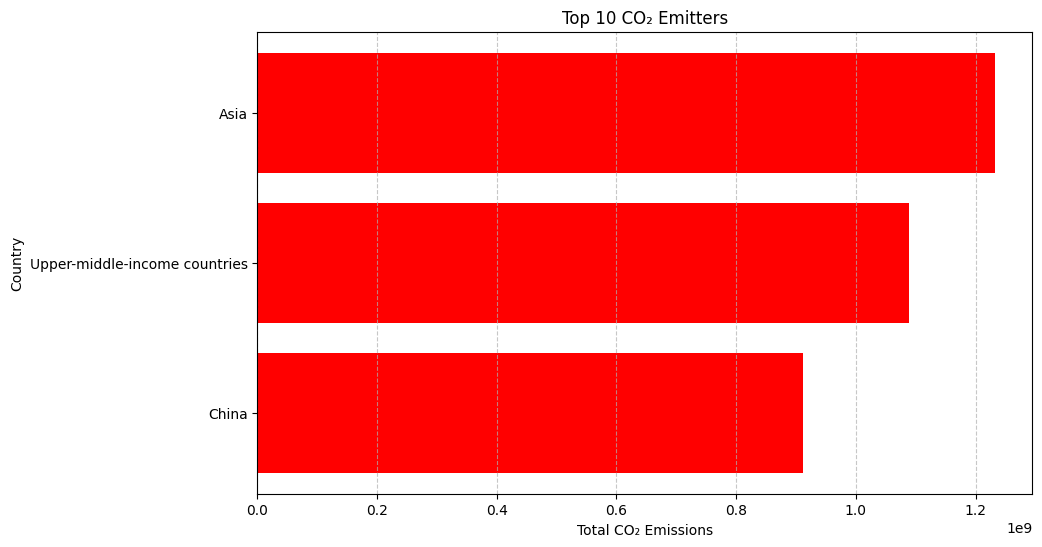

In [24]:
# Plot top 10 emitters
plt.figure(figsize=(10, 6))
plt.barh(top_10_emitters["Country"], top_10_emitters["growth_emissions_total"], color="red")
plt.xlabel("Total CO₂ Emissions")
plt.ylabel("Country")
plt.title("Top 10 CO₂ Emitters")
plt.gca().invert_yaxis()  # Invert for ranking order
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()